In [1]:
#Define path
video_path = 'data/store-aisle-detection.mp4'

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Generate function that allows to see heatmap
def generate_heatmap(video_path,colormap=cv2.COLORMAP_TWILIGHT):
    #Open video file
    cap = cv2.VideoCapture(video_path)

    bg_subtractor = cv2.createBackgroundSubtractorMOG2(
    history=500,            #Number of frames to use for background modeling
    varThreshold=16,        #Sensibility to detect changes
    detectShadows=True      #Detect shadows
    )

    heatmap_accumulator = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        #Initialize heatmap accumulator if its first iteration -> Should have same size
        if heatmap_accumulator is None:
            heatmap_accumulator = np.zeros_like(frame.shape[:2], dtype=np.float32)

        #Apply background subtraction -> The areas in momevent(objects) will be resalted
        fgmask = bg_subtractor.apply(frame)

        #Accumulate the mask (convert to float to avoid overflow)
        heatmap_accumulator = cv2.add(heatmap_accumulator, fgmask.astype(np.float32))

    #Normalize the heatmap to the range [0, 255]
    heatmap_norm = cv2.normalize(heatmap_accumulator, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    heatmap_norm = np.uint8(heatmap_norm)

    #Apply a colormap (for example, TWILIGHT)
    heatmap_colored = cv2.applyColorMap(heatmap_norm, colormap)

    #Visualitation with matplotlib
    plt.figure(figsize=(10, 8))
    plt.imshow(heatmap_colored)
    plt.title('Heatmap normalized and colored')
    plt.axis('off')
    plt.show()


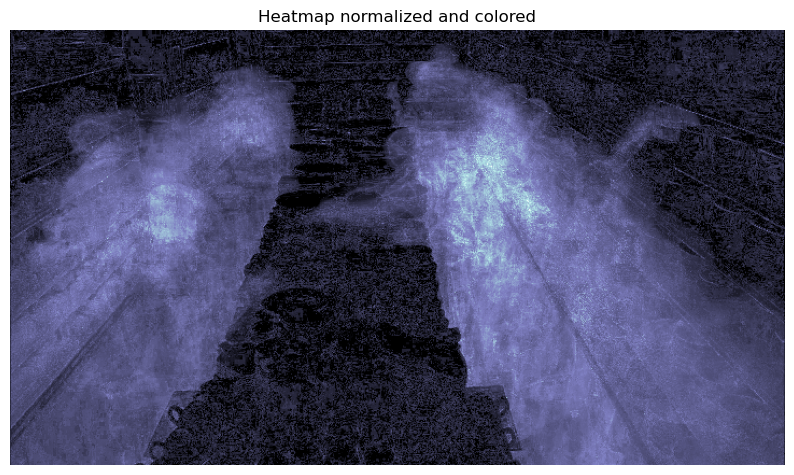

In [19]:
generate_heatmap(video_path, colormap=cv2.COLORMAP_PINK)

Let's see with another video

In [12]:
video2_path= 'data/park_detection.avi' 

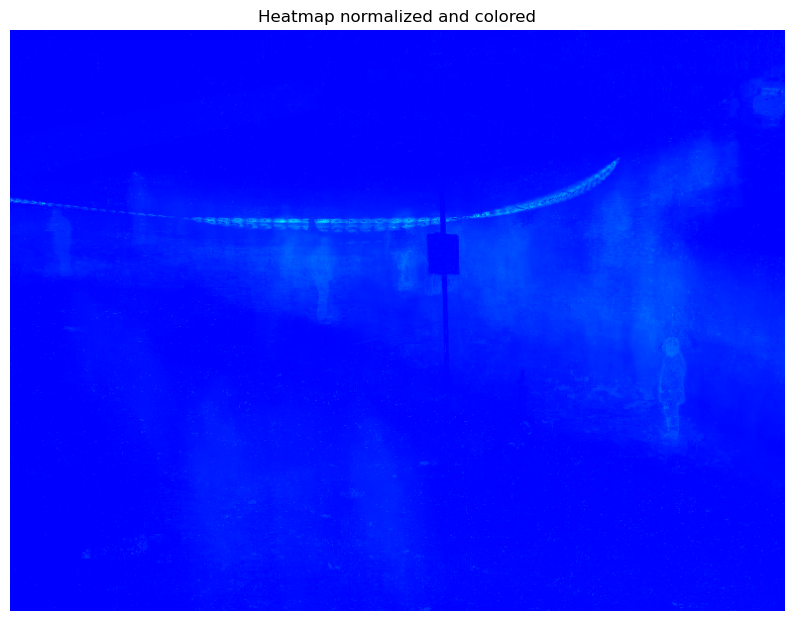

In [18]:
generate_heatmap(video2_path, colormap=cv2.COLORMAP_AUTUMN)

Original code here down

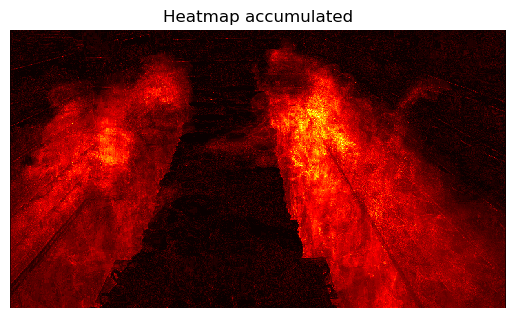

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Open video
cap = cv2.VideoCapture(video_path)

#Creat sustractor background
bg_subtractor = cv2.createBackgroundSubtractorMOG2(
    history=500,            #Number of frames to use for background modeling
    varThreshold=16,        #Sensibility to detect changes
    detectShadows=True      #Detect shadows
)

heatmap_accumulator = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

    #Initialize heatmap accumulator if its first iteration -> Should have same size
    if heatmap_accumulator is None:
        heatmap_accumulator = np.zeros_like(frame.shape[:2], dtype=np.float32)

    #Apply background subtraction -> The areas in momevent(objects) will be resalted
    fgmask = bg_subtractor.apply(frame)

    #Accumulate the mask (convert to float to avoid overflow)
    heatmap_accumulator = cv2.add(heatmap_accumulator, fgmask.astype(np.float32))

#Show the heatmap
plt.imshow(heatmap_accumulator, cmap='hot', interpolation='nearest')
plt.title('Heatmap accumulated')
plt.axis('off')
plt.show()

Heatmap normalizated, if you had so much movement it will be all red

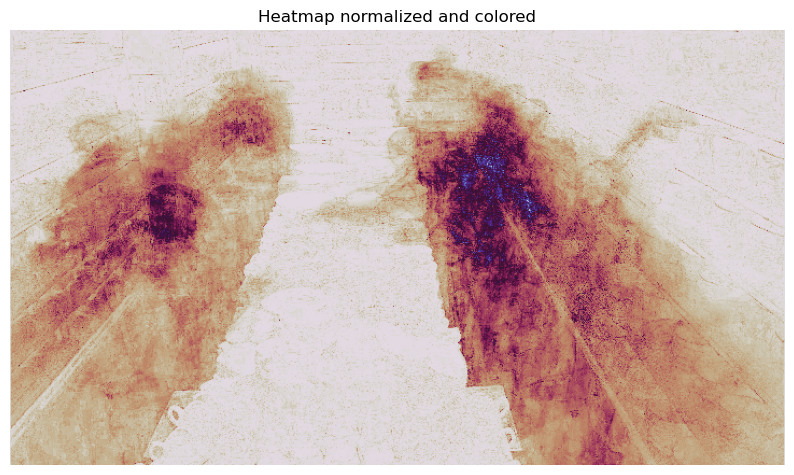

In [ ]:
#Normalize the heatmap to the range [0, 255]
heatmap_norm = cv2.normalize(heatmap_accumulator, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
heatmap_norm = np.uint8(heatmap_norm)

#Apply a colormap (for example, TWILIGHT)
heatmap_colored = cv2.applyColorMap(heatmap_norm, cv2.COLORMAP_TWILIGHT)

#Visualitation with matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_colored)
plt.title('Heatmap normalized and colored')
plt.axis('off')
plt.show()